In [8]:
import sys
import swifter
import timeit
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
sns.set_style('whitegrid')
plt.style.use('seaborn-whitegrid')
%matplotlib inline

__author__ = 'HK Dambanemuya'
__version__ = 'Python 2'

'''
    Analysis originaly performed in Python 2 (deprecated)
    Seaborn, Statsmodel, and * imports broken in Python 3
'''

In [9]:
listing_1 = pd.read_csv("../Data/lender_listing_fe/lender_listing_fe_10k.csv")
listing_2 = pd.read_csv("../Data/lender_listing_fe/lender_listing_fe_20k.csv")
listing_3 = pd.read_csv("../Data/lender_listing_fe/lender_listing_fe_30k.csv")
listing_4 = pd.read_csv("../Data/lender_listing_fe/lender_listing_fe_40k.csv")
listing_5 = pd.read_csv("../Data/lender_listing_fe/lender_listing_fe_50k.csv")
listing_6 = pd.read_csv("../Data/lender_listing_fe/lender_listing_fe_60k.csv")
listing_7 = pd.read_csv("../Data/lender_listing_fe/lender_listing_fe_65k.csv")

In [10]:
listing_frames = [listing_1, listing_2, listing_3, listing_4, listing_5, listing_6, listing_7]

In [11]:
data = pd.concat(listing_frames)
data.head()

,ListingKey,BidCreationDate,MemberKey,Bid_Key,BidAmount,BidMinimumRate,BidMinimumYield,ListingStatus,Status,Member_Key,MemberCreationDate,MemberRoles,ListingCreationDate,ListingStartDate,Listing_Key,FundedOrNot,RepaidOrNot,LenderCompletedListings,LenderRepaidListings,LenderTotalListings
0,3FF03364988124297E13A05,2006-05-23 00:09:10,033E336453973913915CD6B,8BA733648467554686BE77F,50.000,nan,nan,Completed,Winning,033E336453973913915CD6B,2005-10-31 00:19:00,"Lender,Group Leader",2006-05-17 15:26:12,2006-05-17 15:26:12,3FF03364988124297E13A05,True,False,49,39,105
1,25713364434040193913F01,2006-06-08 07:26:34,033E336453973913915CD6B,2AAA336638356998360E7B3,0.000,0.153,0.148,Completed,Outbid,033E336453973913915CD6B,2005-10-31 00:19:00,"Lender,Group Leader",2006-06-08 07:26:28,2006-06-08 07:26:28,25713364434040193913F01,True,True,60,47,118
2,B8953365111581953FDF6FF,2006-04-23 13:34:00,033E336453973913915CD6B,83D53366124469674E78EE5,0.000,0.150,0.145,Expired,Outbid,033E336453973913915CD6B,2005-10-31 00:19:00,"Lender,Group Leader",2006-04-20 14:19:00,2006-04-20 14:19:00,B8953365111581953FDF6FF,False,NaN,45,35,98
3,5D64336458879460900B458,2006-03-10 01:38:23,033E336453973913915CD6B,66FB3364871772680D635CD,0.000,0.090,0.085,Completed,Outbid,033E336453973913915CD6B,2005-10-31 00:19:00,"Lender,Group Leader",2006-03-06 19:25:21,2006-03-06 19:25:21,5D64336458879460900B458,True,True,28,24,65
4,113D3366128622300E1DBFD,2006-03-10 01:29:51,033E336453973913915CD6B,2D8F33643708284747DB1FF,0.000,0.150,0.145,Completed,Outbid,033E336453973913915CD6B,2005-10-31 00:19:00,"Lender,Group Leader",2006-03-08 08:15:31,2006-03-08 08:15:31,113D3366128622300E1DBFD,True,True,29,25,66


In [12]:
data = data[['ListingKey', 'MemberKey', 'LenderCompletedListings', 'LenderRepaidListings', 'LenderTotalListings']]
data["LenderListingSuccessRate"] = data['LenderCompletedListings'] / data['LenderTotalListings']
data["LenderRepaymentSuccessRate"] = data['LenderRepaidListings'] / data['LenderCompletedListings']
data[["ListingKey", "MemberKey", "LenderListingSuccessRate", "LenderRepaymentSuccessRate"]].to_csv("../Data/Lender_listing_success_rate.csv", index=False)
print len(data)
data.head()

9733452


,ListingKey,MemberKey,LenderCompletedListings,LenderRepaidListings,LenderTotalListings,LenderListingSuccessRate,LenderRepaymentSuccessRate
0,3FF03364988124297E13A05,033E336453973913915CD6B,49,39,105,0.467,0.796
1,25713364434040193913F01,033E336453973913915CD6B,60,47,118,0.508,0.783
2,B8953365111581953FDF6FF,033E336453973913915CD6B,45,35,98,0.459,0.778
3,5D64336458879460900B458,033E336453973913915CD6B,28,24,65,0.431,0.857
4,113D3366128622300E1DBFD,033E336453973913915CD6B,29,25,66,0.439,0.862


In [4]:
data = pd.concat(listing_frames)
data['Listing_Key'] = data.ListingKey
data = data[['Listing_Key', 'ListingKey', 'LenderCompletedListings', 'LenderRepaidListings', 'LenderTotalListings']]
data["LenderListingSuccessRate"] = data['LenderCompletedListings'] / data['LenderTotalListings']
data["LenderRepaymentSuccessRate"] = data['LenderRepaidListings'] / data['LenderCompletedListings']
data.head()

,Listing_Key,ListingKey,LenderCompletedListings,LenderRepaidListings,LenderTotalListings,LenderListingSuccessRate,LenderRepaymentSuccessRate
0,3FF03364988124297E13A05,3FF03364988124297E13A05,49,39,105,0.467,0.796
1,25713364434040193913F01,25713364434040193913F01,60,47,118,0.508,0.783
2,B8953365111581953FDF6FF,B8953365111581953FDF6FF,45,35,98,0.459,0.778
3,5D64336458879460900B458,5D64336458879460900B458,28,24,65,0.431,0.857
4,113D3366128622300E1DBFD,113D3366128622300E1DBFD,29,25,66,0.439,0.862


In [5]:
del listing_1
del listing_2
del listing_3
del listing_4
del listing_5
del listing_6
del listing_7
del listing_frames

In [6]:
data[data.Listing_Key=="3FF03364988124297E13A05"].head()

,Listing_Key,ListingKey,LenderCompletedListings,LenderRepaidListings,LenderTotalListings,LenderListingSuccessRate,LenderRepaymentSuccessRate
0,3FF03364988124297E13A05,3FF03364988124297E13A05,49,39,105,0.467,0.796
211,3FF03364988124297E13A05,3FF03364988124297E13A05,61,46,136,0.449,0.754
512,3FF03364988124297E13A05,3FF03364988124297E13A05,6,6,7,0.857,1.000
1322,3FF03364988124297E13A05,3FF03364988124297E13A05,32,21,41,0.780,0.656
1904,3FF03364988124297E13A05,3FF03364988124297E13A05,15,9,35,0.429,0.600


## Mean

In [6]:
f_avg = {'ListingKey': ['max'],
         'LenderCompletedListings': ['mean'],
         'LenderRepaidListings': ['mean'],
         'LenderTotalListings': ['mean'],
         'LenderListingSuccessRate': ['mean'],
         'LenderRepaymentSuccessRate': ['mean']
}
lender_mean_attr = pd.DataFrame(data.groupby(["Listing_Key"]).agg(f_avg).as_matrix())
lender_mean_attr = lender_mean_attr.rename(index=str, columns={0: "LenderAvgRepaidListings", 
                                                             1: "ListingKey",
                                                             2: "LenderAvgTotalListings",
                                                             3: "LenderAvgListingSuccessRate",
                                                             4: "LenderAvgRepaymentSuccessRate",
                                                             5: "LenderAvgCompletedListings"})
lender_mean_attr.head()

,LenderAvgRepaidListings,ListingKey,LenderAvgTotalListings,LenderAvgListingSuccessRate,LenderAvgRepaymentSuccessRate,LenderAvgCompletedListings
0,207.000,00003383856420083050622,636.000,0.550,0.620,336.500
1,252.000,00003405662222292C12B86,5689.000,0.049,0.903,279.000
2,979.000,000034085359462718B9059,8627.000,0.180,0.630,1555.000
3,106.500,000034203787284229CBEF1,541.000,0.434,0.531,200.000
4,209.360,00003423466422120D65CA3,854.124,0.527,0.633,344.562


## Median Deviation

In [7]:
# f_median = {'ListingKey': ['max'],
#          'LenderCompletedListings': ['median'],
#          'LenderRepaidListings': ['median'],
#          'LenderTotalListings': ['median'],
#          'LenderListingSuccessRate': ['median'],
#          'LenderRepaymentSuccessRate': ['median']
# }
# lender_median_attr = pd.DataFrame(data.groupby(["Listing_Key"]).agg(f_median).as_matrix())
# lender_median_attr = lender_median_attr.rename(index=str, columns={0: "LenderMedianRepaidListings", 
#                                                                  1: "ListingKey",
#                                                                  2: "LenderMedianTotalListings",
#                                                                  3: "LenderMedianListingSuccessRate",
#                                                                  4: "LenderMedianRepaymentSuccessRate",
#                                                                  5: "LenderMedianCompletedListings"})
# lender_median_attr.head()

## Standard Deviation

In [8]:
# f_std = {'ListingKey': ['max'],
#          'LenderCompletedListings': ['std'],
#          'LenderRepaidListings': ['std'],
#          'LenderTotalListings': ['std'],
#          'LenderListingSuccessRate': ['std'],
#          'LenderRepaymentSuccessRate': ['std']
# }

# lender_std_attr = pd.DataFrame(data.groupby(["Listing_Key"]).agg(f_std).as_matrix())
# lender_std_attr = lender_std_attr.rename(index=str, columns={0: "LenderStdRepaidListings", 
#                                                              1: "ListingKey",
#                                                              2: "LenderStdTotalListings",
#                                                              3: "LenderStdListingSuccessRate",
#                                                              4: "LenderStdRepaymentSuccessRate",
#                                                              5: "LenderStdCompletedListings"})
# lender_std_attr.head()

In [9]:
# np.mean(listing_data[listing_data["ListingKey"]=="00003383856420083050622"].groupby(["Listing_Key"]).agg(f_median))

## Merge Listing Feature DataFrames

In [10]:
# Prepare final data
final_lender_data = lender_mean_attr
del lender_mean_attr
# final_lender_data = final_lender_data.merge(lender_median_attr, on="ListingKey")
# final_lender_data = final_lender_data.merge(lender_std_attr, on="ListingKey")
final_lender_data.head()

,LenderAvgRepaidListings,ListingKey,LenderAvgTotalListings,LenderAvgListingSuccessRate,LenderAvgRepaymentSuccessRate,LenderAvgCompletedListings
0,207.000,00003383856420083050622,636.000,0.550,0.620,336.500
1,252.000,00003405662222292C12B86,5689.000,0.049,0.903,279.000
2,979.000,000034085359462718B9059,8627.000,0.180,0.630,1555.000
3,106.500,000034203787284229CBEF1,541.000,0.434,0.531,200.000
4,209.360,00003423466422120D65CA3,854.124,0.527,0.633,344.562


## Import Class Variable

In [11]:
listing_data = pd.read_csv("../Data/ProjectLevelData.txt", sep="|")
listing_data = listing_data.loc[(listing_data['RepaidOrNot']==True) | (listing_data['RepaidOrNot']==False)]
listing_data = listing_data[["ListingKey", "RepaidOrNot"]]
listing_data.head()

,ListingKey,RepaidOrNot
17,00033425227988088FA6752,True
21,000433785890431972B4743,False
38,00083422661625108817246,True
46,000A34209897973969CFA81,True
56,000D3410451511356B08F17,True


## Merge Features and Class Variable

In [12]:
del data

In [13]:
final_data = final_lender_data.merge(listing_data, on="ListingKey")
final_data['RepaidOrNot'] = final_data['RepaidOrNot'].astype(int)
final_data.head()

,LenderAvgRepaidListings,ListingKey,LenderAvgTotalListings,LenderAvgListingSuccessRate,LenderAvgRepaymentSuccessRate,LenderAvgCompletedListings,RepaidOrNot
0,169.333,00033425227988088FA6752,561.267,0.653,0.517,326.600,1
1,58.267,000433785890431972B4743,189.933,0.659,0.469,123.000,0
2,220.064,00083422661625108817246,423.128,0.780,0.727,303.383,1
3,74.500,000A34209897973969CFA81,138.000,0.707,0.753,93.000,1
4,84.444,000D3410451511356B08F17,255.088,0.658,0.591,145.393,1


## Check Feature Correlation

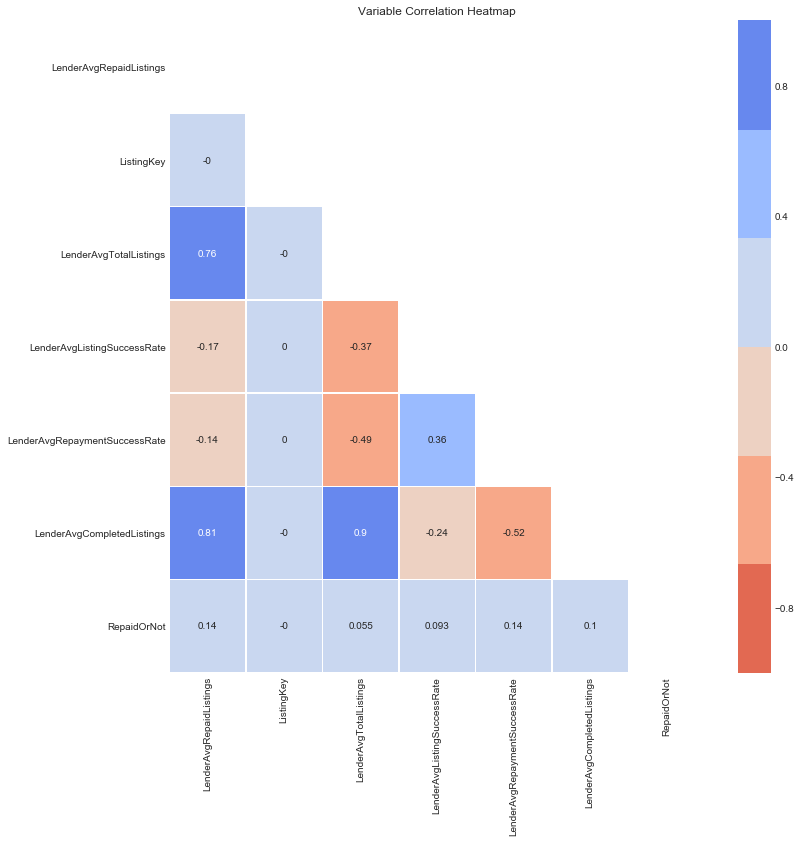

In [14]:
corr = final_data.swifter.apply(pd.to_numeric, errors='coerce').corr(method='pearson')
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(12,12))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap=sns.color_palette("coolwarm_r"),
        mask = mask,
        linewidths=.5,
        vmin=-1,
        vmax=1,
        annot=True)
plt.title("Variable Correlation Heatmap")
plt.show()

## Save Data to CSV

In [15]:
## Save data to csv file
# final_lender_data.to_csv("../Data/lender_listing_attr_filtered.csv", index=False)
# selected_attributes = ["LenderAvgRepaymentSuccessRate", "LenderAvgListingSuccessRate", "LenderAvgRepaidListings",
#                        "LenderAvgCompletedListings", "LenderAvgTotalListings"]
final_lender_data.to_csv("../Data/lender_listing_attr.csv", index=False)